In [1]:
'''Entry point for the particle filtering code, use for the datasets *_FLU_HOSPITALIZATIONS.csv'''

import sys
sys.path.append('../') #appending the path is only necessary for the jupyter notebook

import numpy as np
from Implementations.algorithms.TimeDependentBeta import TimeDependentAlgo
from Implementations.resamplers.resamplers import PoissonResample,NBinomResample
from Implementations.solvers.DeterministicSolvers import LSODACalvettiSolver,LSODASolver,LSODASolverSEIARHD
from Implementations.perturbers.perturbers import MultivariatePerturbations
from utilities.Utils import Context,ESTIMATION
from functools import partial


'''First thing to do is set up the algorithm object, this is a class which encapsulates the whole particle filter, it contains information about the integrator, the perturber, the resampler, and a 
dataclass which holds metadata and setup information needed at runtime.'''

algo = TimeDependentAlgo(integrator = LSODASolver(),
                        perturb = MultivariatePerturbations(hyper_params={"h":0.5,"sigma1":0.05,"sigma2":0.1}),
                        resampler = NBinomResample(),
                        ctx=Context(population=7_780_000,
                                    state_size = 4,
                                    prior_weights=np.zeros(1000),
                                    pos_weights = np.zeros(1000),
                                    weight_ratio=np.ones(1000),
                                    seed_loc=[1],
                                    seed_size=0.005,
                                    forward_estimation=1,
                                    rng=np.random.default_rng(2),
                        particle_count=1000))

algo.initialize(params={
"beta":ESTIMATION.VARIABLE,
"gamma":0.06,
"mu":0.004,
"q":0.1,
"eta":0.1,
"std":10,
"R":50,
"hosp":10,
"L":90,
"D":ESTIMATION.STATIC,
}
,priors={"beta":partial(algo.ctx.rng.uniform,0.1,0.15), 
          "D":partial(algo.ctx.rng.uniform,0,15),
          })

'''Runs the PF over the specified data set for the specified length of time'''

#algo.print_particles()
algo.run(f'../datasets/AZ_FLU_HOSPITALIZATIONS.csv',120)



[493 445 350 327  71 493 493 445 461 842 986 360 342 327 327 986 379 327
 327 493 379 513 986 350 898 342 342 986 513 513 898 379 379 327 445 461
 461 350 327 350  71  28 162  28 842  71 342 842 337 461 713 379 513 513
 327 842 493 327 713 713 842 493 517 327 842 162 445 360 493 986 898 342
 531 583  28 713 445 445 342 445 379  28 327 842 342 842 395 513  28  71
  71 493 350 162 713 350 445 493 445 379  28 337 513 513 986  28 337 162
 713 513 713 342 842  28 162 342 513 493 162 162 686 379 156  28 162 162
 713 327 898 395 493 156 327 342 162 395 327 327 350 513 898 327 898 445
  28 342 713 162 350 350 327 513 445 327 898 513 842 898 360 379 461  28
 713 842 583 445 713 513 842 501 379 379 513 162 842 898 842 445  28 842
 327  28 379 898 493 342 162 445 350 327 342 713 461 379 327 379  71 513
 513 350 379 445 350 898 350 842 986 379 155 513 379 445 898 156 842 379
 327 342 342 395 898 513 445 842 395 327 350 898 583 445 898 327 842 898
 350 379 342  28 342 842 162 350 379 162 327 342 46

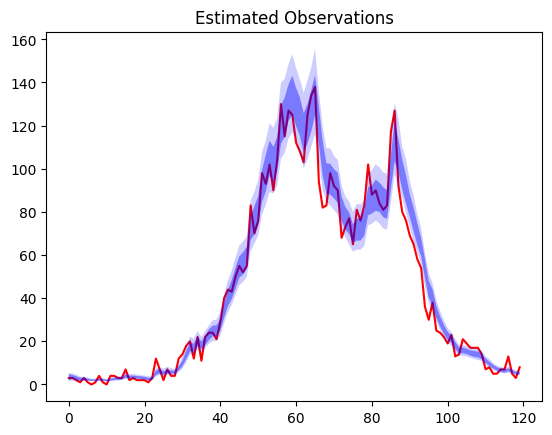

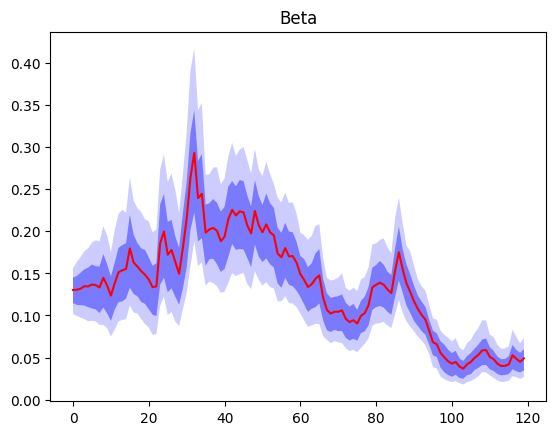

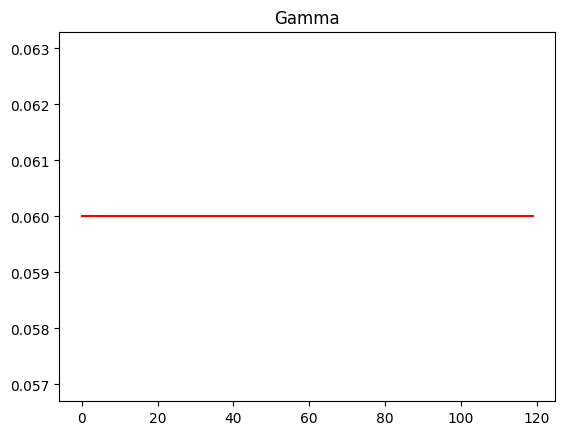

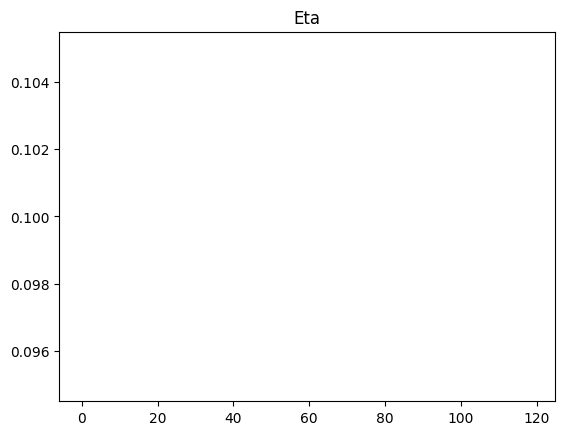

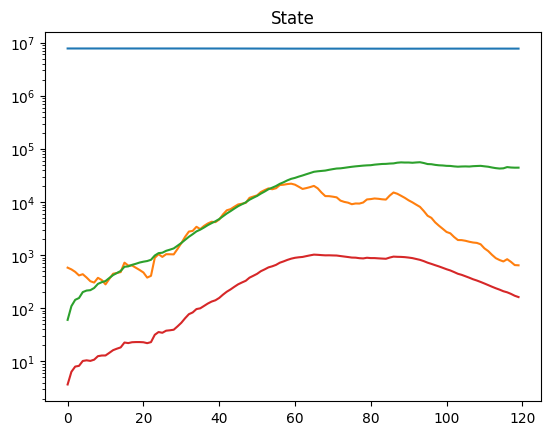

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = pd.read_csv('../datasets/AZ_FLU_HOSPITALIZATIONS.csv').to_numpy()
real_data = np.delete(real_data,0,1)

estimated_data = pd.read_csv('../datasets/particle_observation.csv').to_numpy()
estimated_data = np.delete(estimated_data,0,1)


t = 120

plt.title("Estimated Observations")

plt.fill_between(np.arange(0,t), estimated_data[:,3], estimated_data[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), estimated_data[:,6], estimated_data[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.plot(np.arange(0,t),real_data[0:t],color='red')
plt.show()

pf_beta = pd.read_csv('../datasets/average_beta.csv').to_numpy()
pf_beta = np.delete(pf_beta,0,1)




beta_quantiles = pd.read_csv('../datasets/beta_quantiles.csv').to_numpy()
beta_quantiles = np.delete(beta_quantiles,0,1)

pf_eta = pd.read_csv('../datasets/average_eta.csv').to_numpy()
pf_eta = np.delete(pf_eta,0,1)
eta_quantiles = pd.read_csv('../datasets/eta_quantiles.csv').to_numpy()
eta_quantiles = np.delete(eta_quantiles,0,1)

pf_gamma = pd.read_csv('../datasets/average_gamma.csv').to_numpy()
pf_gamma = np.delete(pf_gamma,0,1)
gamma_quantiles = pd.read_csv('../datasets/gamma_quantiles.csv').to_numpy()
gamma_quantiles = np.delete(gamma_quantiles,0,1)

pf_state = pd.read_csv('../datasets/ESTIMATED_STATE.csv').to_numpy()
pf_state = np.delete(pf_state,0,1)

plt.title("Beta")

plt.fill_between(np.arange(0,t), beta_quantiles[:,3], beta_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), beta_quantiles[:,6], beta_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.plot(pf_beta,color="red",zorder=12)
plt.savefig('Beta.png')
plt.show()

plt.title("Gamma")

plt.plot(pf_gamma,zorder=12,color = 'red')
plt.fill_between(np.arange(0,t), gamma_quantiles[:,3], gamma_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), gamma_quantiles[:,6], gamma_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.show()

plt.title("Eta")

plt.fill_between(np.arange(0,t), eta_quantiles[:,3], eta_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), eta_quantiles[:,6], eta_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.show()

plt.yscale('log')
plt.title("State")
plt.plot(pf_state)
plt.savefig('State.png')

